IMPORTING LIBRARIES AND DATASET

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [105]:
data = pd.read_csv("/home/shivaprakash/Documents/git/Machine-Learning/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EXPLORATORY DATA ANALYSIS

In [106]:
data.shape

(891, 12)

In [107]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
edata = data.copy()

DATA CLEANING

1 . Missing/Null values handling

    Methods to handle :
    a) Remove 
    b) Impute - mean , median , mode , frequency , function mapping  


In [102]:
#remove

edata.dropna(axis=1 , inplace=True)
edata

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [111]:
#IMPUTE

#MEAN

edata['Age'].fillna(edata['Age'].mean() , inplace=True)
edata['Age'].isnull().sum()

0

In [19]:
#MEDIAN

edata['Age'].fillna(edata['Age'].median() , inplace=True)
edata['Age'].isnull().sum()

0

In [46]:
#MODE

edata['Embarked'].fillna(edata['Embarked'].mode()[0] , inplace=True)
edata['Embarked'].isnull().sum()

0

In [47]:
#FUNCTION MAPPING

import re
for i , name in enumerate( edata['Name']):
  if (re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name))) and (pd.isna(edata.loc[i,'Age'])):
    edata.loc[i,'Age']= 35
  elif (re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name))) and (pd.isna(edata.loc[i,'Age'])):
    edata.loc[i,'Age']= 17


In [42]:
edata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
#originaldata working

data['Embarked'].fillna(data['Embarked'].mode()[0] , inplace=True)

data = data.drop('Cabin', axis=1)

import re
for i , name in enumerate( data['Name']):
  if (re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name))) and (pd.isna(data.loc[i,'Age'])):
    data.loc[i,'Age']= 35
  elif (re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name))) and (pd.isna(data.loc[i,'Age'])):
    data.loc[i,'Age']= 17

In [113]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [114]:
edata=data.copy()

In [116]:
hdata = edata.copy()

2.OUTLIER REMOVAL

    -> Highly Deviated data from the rest of the datasets
    -> Affects the model learning process
    -> Can be identified by visualization techniques
    -> Ways to remove:
        a) z-score - similar to standard scaler in sklearn
        b) IQR - drop , cap 
    

<Axes: xlabel='PassengerId', ylabel='Age'>

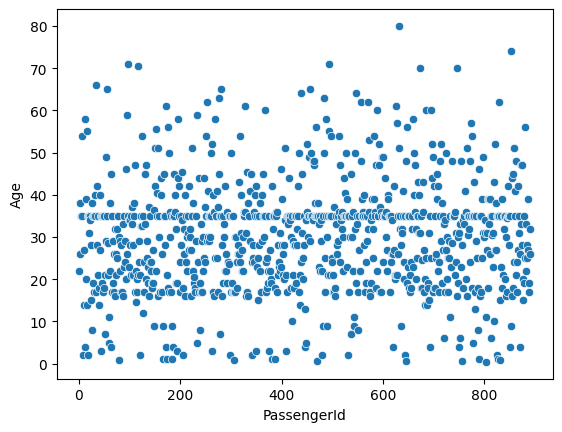

In [45]:
#visualization

sns.scatterplot(x=edata['PassengerId'] , y= edata['Age'])

In [46]:
edata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

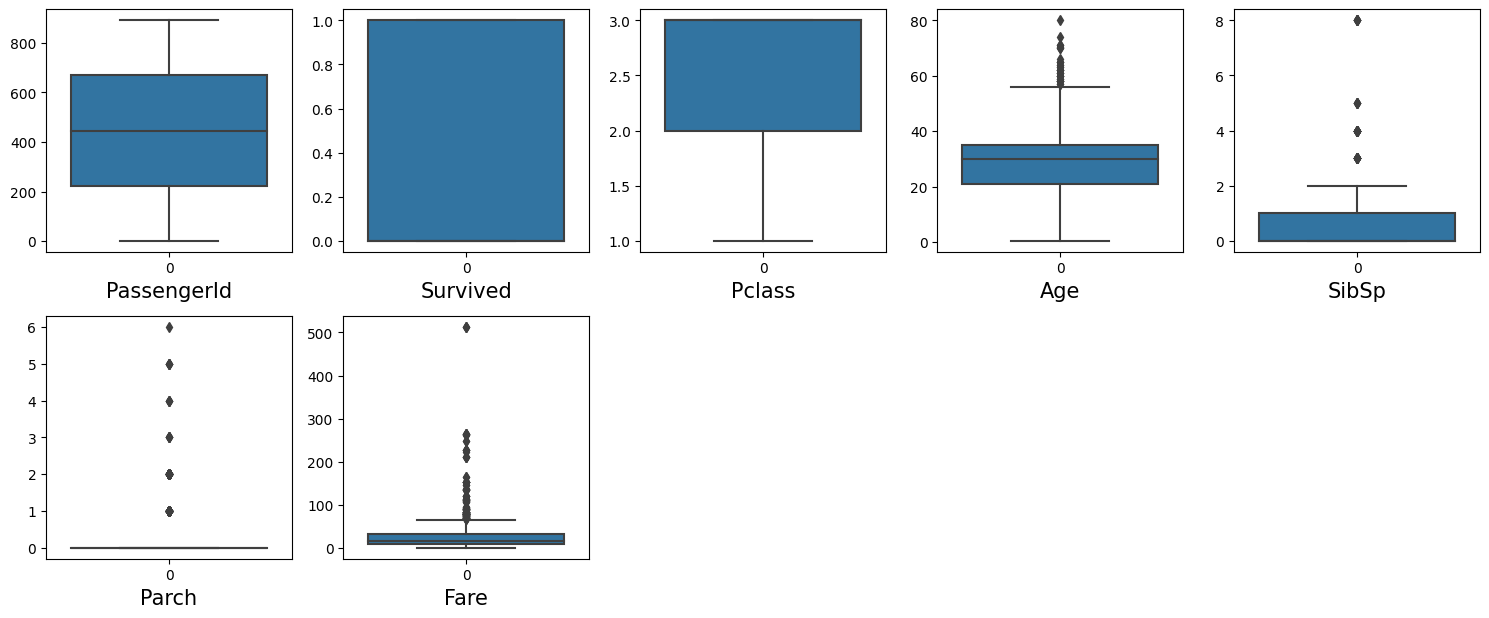

In [47]:
columns = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

plt.figure(figsize=(15,15))
plotnumber=1

for col in columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(edata[col])
    plt.xlabel(col,fontsize=15)
  plotnumber+=1
plt.tight_layout()

In [117]:
#IQR

iqr_fare = edata['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
low_f = data['Fare'].quantile(0.5) - 1.5 * iqr_fare
high_f = 300

In [118]:
low_f

-20.1802

In [119]:
data['Fare'] = np.where(
    data['Fare'] > high_f,
    high_f,
    np.where(
        data['Fare'] < low_f,
        low_f,
        data['Fare']
    )
)


<Axes: xlabel='Fare'>

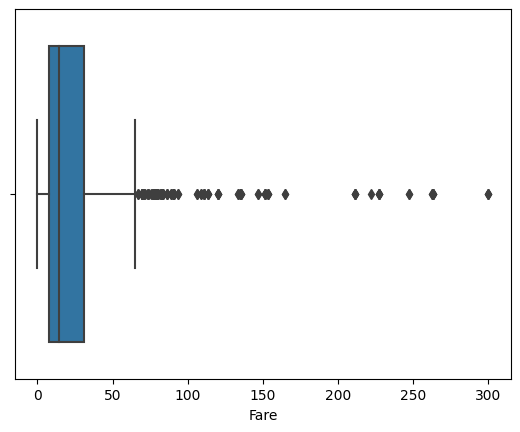

In [120]:
sns.boxplot(x=data['Fare'])

In [121]:
np.where( (data['Survived']==0) & (data['Age']>60) )

(array([ 33,  54,  96, 116, 170, 252, 280, 326, 438, 456, 493, 545, 555,
        625, 672, 745, 851]),)

In [122]:
data['Age'] = np.where(data['Age'] > 60,60,data['Age'])


<Axes: xlabel='Age'>

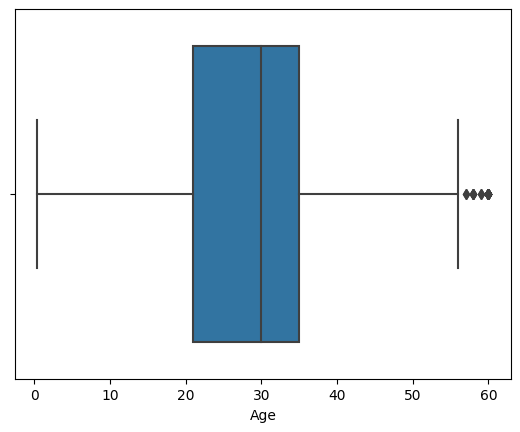

In [123]:
sns.boxplot(x=data['Age'])

3. DATA TYPE SETTING

    1. This step is crucial because data may be imported from various sources or collected from different systems, and it might not always be in the desired format for analysis or modeling

        - >Converting Strings to Numbers     #df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
        - >Converting Strings to Datetime    #df['Date'] = pd.to_datetime(df['Date'])
        - >Converting Categorical Data to Numeric    #df = pd.get_dummies(df, columns=['Color'])
        - >Converting Numbers to Strings     #df['ID'] = df['ID'].astype(str)
        - >Converting Timestamps to Specific Formats     #df['Formatted_Date'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [124]:
edata=data.copy()

Search : https://chat.openai.com/share/e6665319-7932-46cc-8443-f005cda17ad9

DATA PREPROCESSING

1. ENCODING :
     - > Used to convert continuous data into categorical data and vice versa
     - > Processes involved :
         a) OneHot Encoder ,
         b)Label Encoder ,
         c)Integer Encoder 

In [125]:
#OneHotEncoding   -    to be used when transforming feature variables 

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False , drop='first')
encoded_age = encoder.fit_transform(edata['Sex'].values.reshape(-1,1))
encoded_age_df = pd.DataFrame(encoded_age , columns=encoder.get_feature_names_out(['Sex']))
edata = pd.concat([edata , encoded_age_df] , axis=1)
edata = edata.drop('Sex',axis=1)

/home/shivaprakash/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [126]:
edata

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",17.0,1,2,W./C. 6607,23.4500,S,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1.0


In [127]:
encoded_emb = encoder.fit_transform(data['Embarked'].values.reshape(-1,1))
encoded_emb_df = pd.DataFrame(encoded_emb , columns=encoder.get_feature_names_out(['Embarked']))
edata = pd.concat([edata,encoded_emb_df] , axis=1)
edata = edata.drop('Embarked' , axis=1)


/home/shivaprakash/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
#get_dummies in form of binning
age_bins = [0, 20, 30, 40, 50,  float('inf')]
age_labels = ['<20', '20-29', '30-39', '40-49', '50<']

# Convert the 'Age' column into categorical bins
edata['Age_Group'] = pd.cut(edata['Age'], bins=age_bins, labels=age_labels, right=False)

# Perform one-hot encoding on the 'Age_Group' column
one_hot_encoded = pd.get_dummies(edata['Age_Group'], prefix='Age_Group')

# Concatenate the one-hot encoded columns back to the original DataFrame
edata = pd.concat([edata, one_hot_encoded], axis=1)

# Drop the original 'Age' and 'Age_Group' columns
edata.drop(['Age', 'Age_Group'], axis=1, inplace=True)

edata

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_<20,Age_Group_20-29,Age_Group_30-39,Age_Group_40-49,Age_Group_50<
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,1.0,0.0,1.0,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0.0,0.0,0.0,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.0,0.0,1.0,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,1.0,0.0,1.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,1.0,0.0,1.0,False,True,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.0,0.0,1.0,True,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,1.0,True,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,0.0,0.0,False,True,False,False,False


In [129]:
data = edata.copy()

In [130]:
edata = data.copy()

In [131]:
edata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Age_Group_<20',
       'Age_Group_20-29', 'Age_Group_30-39', 'Age_Group_40-49',
       'Age_Group_50<'],
      dtype='object')

In [132]:
cols = ['Age_Group_<20', 'Age_Group_20-29','Age_Group_30-39', 'Age_Group_40-49', 'Age_Group_50<']

for col in cols:
    data[col] = data[col].astype(int)

In [133]:
data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_<20,Age_Group_20-29,Age_Group_30-39,Age_Group_40-49,Age_Group_50<
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,1.0,0.0,1.0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0.0,0.0,0.0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.0,0.0,1.0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,1.0,0.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,1.0,0.0,1.0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.0,0.0,1.0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,1.0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,0.0,0.0,0,1,0,0,0


In [134]:
edata = data.copy()

In [135]:
data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_<20,Age_Group_20-29,Age_Group_30-39,Age_Group_40-49,Age_Group_50<
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,1.0,0.0,1.0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0.0,0.0,0.0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0.0,0.0,1.0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,1.0,0.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,1.0,0.0,1.0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0.0,0.0,1.0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,1.0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,0.0,0.0,0,1,0,0,0


In [136]:
sdata=data.copy()

In [137]:
data=sdata.copy()

2 . SCALING:

    - > a) Standardization - convert the data distribution into center of the four quadrant
    - > b) Normalization
            > i) Min max scaler - range(0,1)
            > ii) Mean Normalization scaler - similar to standard scaler
            > iii) Max Absolute scaler - when the data has more zero values
            > iv) Robust scaler - works well with outliers

In [138]:
edata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Age_Group_<20',
       'Age_Group_20-29', 'Age_Group_30-39', 'Age_Group_40-49',
       'Age_Group_50<'],
      dtype='object')

In [139]:
passenger_id = edata['PassengerId']
target = edata['Survived']
edata = edata.drop(['PassengerId','Name','Ticket','Survived','Age_Group_<20'] , axis=1)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(edata)
edata = pd.DataFrame(scaled_data, columns=edata.columns)

In [141]:
edata

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_20-29,Age_Group_30-39,Age_Group_40-49,Age_Group_50<
0,0.827377,0.432793,-0.473674,-0.551541,0.737695,-0.307562,0.615838,1.746425,-0.719644,-0.333125,-0.300957
1,-1.566107,0.432793,-0.473674,0.905472,-1.355574,-0.307562,-1.623803,-0.572598,1.389576,-0.333125,-0.300957
2,0.827377,-0.474545,-0.473674,-0.536182,-1.355574,-0.307562,0.615838,1.746425,-0.719644,-0.333125,-0.300957
3,-1.566107,0.432793,-0.473674,0.491730,-1.355574,-0.307562,0.615838,-0.572598,1.389576,-0.333125,-0.300957
4,0.827377,-0.474545,-0.473674,-0.533338,0.737695,-0.307562,0.615838,-0.572598,1.389576,-0.333125,-0.300957
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.420705,0.737695,-0.307562,0.615838,1.746425,-0.719644,-0.333125,-0.300957
887,-1.566107,-0.474545,-0.473674,-0.033887,-1.355574,-0.307562,0.615838,-0.572598,-0.719644,-0.333125,-0.300957
888,0.827377,0.432793,2.008933,-0.182926,-1.355574,-0.307562,0.615838,-0.572598,-0.719644,-0.333125,-0.300957
889,-1.566107,-0.474545,-0.473674,-0.033887,0.737695,-0.307562,-1.623803,1.746425,-0.719644,-0.333125,-0.300957


In [142]:
data = edata.copy()
data = pd.concat([data , target],axis=1)

3 . FEATURE SELECTION :

    Helps in the process selecting and omiting features in the given dataset

<Axes: >

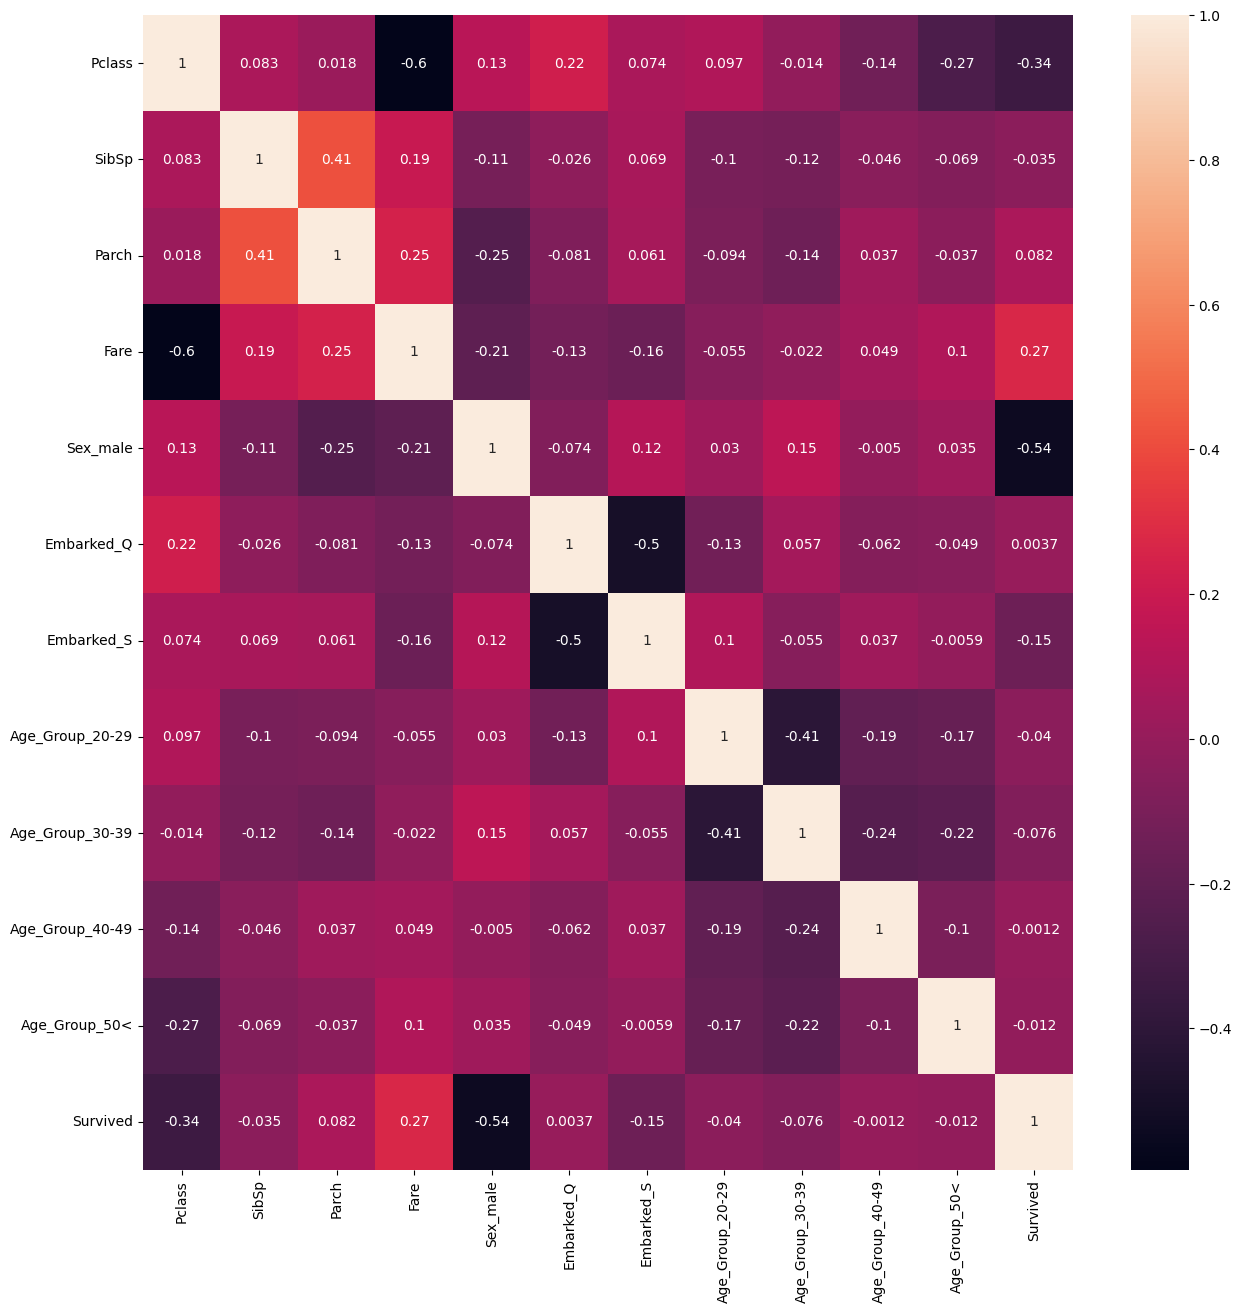

In [143]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr() , annot=True)

The following topics are not covered in the above processing

    i) Polynomial Transformation
    ii) Dimensionality Reduction

4 .TRAIN-TEST-SPLIT

In [144]:
feature = data.drop(['Parch','SibSp','Survived'], axis=1)
target = data['Survived']

In [145]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =  train_test_split( feature , target , test_size = 0.2 , random_state=42 )

MODEL SELECTION 

    This process is used to compare the model and find the best model out of it . We can use cross - validation techniques to find the best model 
    

In [150]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [147]:
#cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [148]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('GB',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))

In [149]:
results = []
names=[]

for name, model in models:
  kfold=StratifiedKFold(n_splits=4,random_state=1,shuffle=True)#crossvalidation
  cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print("cv_results",cv_results)
  print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))
  print("")

cv_results [0.80898876 0.76966292 0.78651685 0.74719101]
LR: 0.778090 (0.022647)

cv_results [0.80337079 0.75280899 0.80898876 0.73595506]
KNN: 0.775281 (0.031531)

cv_results [0.78651685 0.74719101 0.78651685 0.74719101]
CART: 0.766854 (0.019663)

cv_results [0.79775281 0.74157303 0.78651685 0.73595506]
RF: 0.765449 (0.027052)

cv_results [0.78651685 0.76966292 0.80898876 0.71348315]
NB: 0.769663 (0.035308)

cv_results [0.83707865 0.80337079 0.83146067 0.76404494]
SVM: 0.808989 (0.028920)

cv_results [0.83707865 0.78651685 0.85955056 0.76404494]
GB: 0.811798 (0.038206)

cv_results [0.81460674 0.7752809  0.79213483 0.78089888]
ADA: 0.790730 (0.015062)



In [211]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1.0],
}

grid_gb= GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=3)
grid_gb.fit(x_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8;, score=0.790 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8;, score=0.832 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8;, score=0.817 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8;, score=0.746 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8;, score=0.796 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9;, score=0.790 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9;, score=0.832 total time=   0.3s
[CV 3/5] END learning_rate

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=3)

In [212]:
print(grid_gb.best_params_)
print(grid_gb.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 400, 'subsample': 1.0}
0.8230276765488032


In [213]:
model1 = GradientBoostingClassifier(
    learning_rate=0.01 ,
    max_depth=3 , 
    max_features='sqrt' ,
    n_estimators=400 ,
    subsample=1.0
)

In [214]:
model1.fit(x_train , y_train)
y_hat1 = model1.predict(x_test)
print(accuracy_score(y_test , y_hat1))

0.7932960893854749


In [219]:
param_grid1 = {
    'n_estimators': [50, 100, 150],            
    'learning_rate': [0.1, 0.5, 1.0],          
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]
}

grid_gb1= GridSearchCV(AdaBoostClassifier(),param_grid=param_grid1,refit=True,verbose=3)
grid_gb1.fit(x_train,y_train)

print(grid_gb1.best_params_)
print(grid_gb1.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=0.797 total time=   0.3s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=0.811 total time=   0.3s
[CV 3/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=0.754 total time=   0.3s
[CV 4/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=0.732 total time=   0.3s
[CV 5/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50;, score=0.824 total time=   0.2s
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=0.797 total time=   0.5s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=0.811 total time=   0.5s
[CV 3/5] END estimator=DecisionTreeClassi

ESTIMATORS

1)REGRESSION:

i)MSE   - np.sum(np.mean((y-y_hat)**2))

    Penalizes the model for wrong predictions . It is not robust to outliers .

ii)MAE    - np.sum(np.mean(|y-y_hat|)

    Doesn't penalizes the model for wrong predictions . It is not robust to outliers .

iii)RMSE    - np.sqrt(np.sum(np.mean((y-y_hat)**2)))

    Model's predictions matches the target variable . Same as MSE .

iv)R2_SCORE    - R2 = 1 - (RSS / TSS)

    It explains how much the variance in the output variable can be explained by the features present in the dataset .

2)CLASSIFICATION:

i) CONFUSION MATRIX:

- >TP,TN,FP,FN :

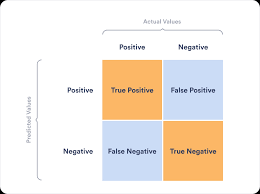

1)True Positive - True data predicted positive in classification

2)True Negative - True data predicted negative in classification

3)False Positive - False data predicted negative in classification

4)False Negative - False data predicted positive in classification





In [154]:
from sklearn.metrics import confusion_matrix

In [153]:
eg_model = LogisticRegression()
eg_model.fit(x_train , y_train)

LogisticRegression()

In [155]:
y_hat = eg_model.predict(x_test)
print(confusion_matrix(y_test , y_hat))

[[88 17]
 [19 55]]


- >ACCURACY SCORE

It represents the percentage of correctly classified instances out of the total instances in the dataset

Formula : Accuracy = (Number of Correct Predictions) / (Total Number of Predictions) 

Formula : Accuracy = (TP + TN) / (TP + TN + FP + FN) 


In [156]:
from sklearn.metrics import accuracy_score

In [157]:
print(accuracy_score(y_test , y_hat))

0.7988826815642458


- > PRECISION

It is used to find how many true values are correctly predicted as true in confusion matrix

Formula : Precision = TP / (TP + FP)

In [158]:
from sklearn.metrics import precision_score

In [159]:
print(precision_score(y_test , y_hat))

0.7638888888888888


- > SENSITIVITY / RECALL

Sensitivity/recall quantifies the ability of the model to correctly identify positive instances (i.e., the true positive rate)

Formula = TP / (TP + FP)

In [160]:
from sklearn.metrics import recall_score
print(recall_score(y_test , y_hat))

0.7432432432432432


In [166]:
cm = confusion_matrix(y_test , y_hat)
cm

array([[88, 17],
       [19, 55]])

In [173]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

print(TP / (TP + FP))

0.8380952380952381


- > SPECIFICITY

Specificity quantifies the ability of the model to correctly identify negatives instances (i.e., the false positive rate)

Formula = TN / (TN + FN)

In [172]:
print(TN / (TN + FN))

0.7432432432432432


- > F1 SCORE 

It provides a balance between precision and recall and is useful when there is an uneven class distribution or when false positives and false negatives have different impacts on the problem

Formula : F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [174]:
from sklearn.metrics import f1_score
print(f1_score(y_test , y_hat))

0.7534246575342465


- > ROC CURVE (Receiver Operating Characteristics Curve) & AUC (Area Under the Curve)

It is created by plotting the true positive rate (sensitivity) against the false positive rate (1-specificity) as the discrimination threshold for the positive class is varied

In [181]:
from sklearn.metrics import roc_curve , roc_auc_score

tpr , fpr , threshold = roc_curve(y_test , y_hat)

In [182]:
auc_roc = roc_auc_score(y_test , y_hat)
auc_roc

0.7906692406692406

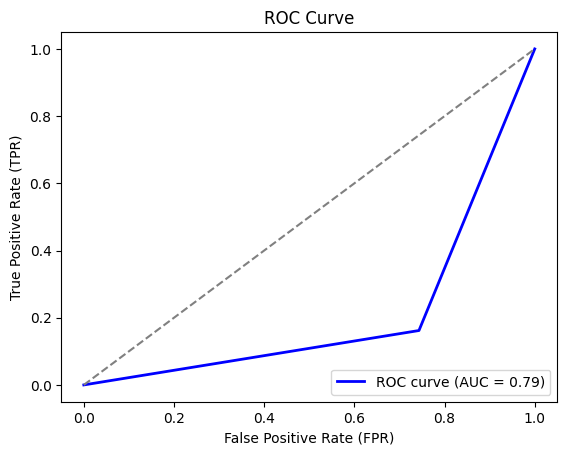

In [180]:
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

 - > https://chat.openai.com/share/e6665319-7932-46cc-8443-f005cda17ad9